<a href="https://colab.research.google.com/github/chrissannahmecanzie/House-Price-Data-Analysis/blob/main/houseprice_task1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import sklearn

In [ ]:
from google.colab import files
upload =files.upload()

Saving house_price.csv to house_price (2).csv


In [ ]:
dataset=pd.read_csv("house_price.csv")

In [ ]:
df=pd.DataFrame(dataset)

In [ ]:
df

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


In [ ]:
print(df.head())

                   location       size  total_sqft  bath   price  bhk  \
0  Electronic City Phase II      2 BHK      1056.0   2.0   39.07    2   
1          Chikka Tirupathi  4 Bedroom      2600.0   5.0  120.00    4   
2               Uttarahalli      3 BHK      1440.0   2.0   62.00    3   
3        Lingadheeranahalli      3 BHK      1521.0   3.0   95.00    3   
4                  Kothanur      2 BHK      1200.0   2.0   51.00    2   

   price_per_sqft  
0            3699  
1            4615  
2            4305  
3            6245  
4            4250  


In [ ]:
print(df.describe())

         total_sqft          bath         price           bhk  price_per_sqft
count  13200.000000  13200.000000  13200.000000  13200.000000    1.320000e+04
mean    1555.302783      2.691136    112.276178      2.800833    7.920337e+03
std     1237.323445      1.338915    149.175995      1.292843    1.067272e+05
min        1.000000      1.000000      8.000000      1.000000    2.670000e+02
25%     1100.000000      2.000000     50.000000      2.000000    4.267000e+03
50%     1275.000000      2.000000     71.850000      3.000000    5.438000e+03
75%     1672.000000      3.000000    120.000000      3.000000    7.317000e+03
max    52272.000000     40.000000   3600.000000     43.000000    1.200000e+07


In [ ]:
price_per_sqft = df['price_per_sqft']

In [ ]:
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13200 entries, 0 to 13199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   location        13200 non-null  object 
 1   size            13200 non-null  object 
 2   total_sqft      13200 non-null  float64
 3   bath            13200 non-null  float64
 4   price           13200 non-null  float64
 5   bhk             13200 non-null  int64  
 6   price_per_sqft  13200 non-null  int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 722.0+ KB
None


In [ ]:
# 1. Mean function
mean = price_per_sqft.mean()
std_dev = price_per_sqft.std()
df_mean = df[(price_per_sqft > (mean - 3*std_dev)) & (price_per_sqft < (mean + 3*std_dev))]

In [ ]:
# 2. Percentile method
lower_percentile = price_per_sqft.quantile(0.01)
upper_percentile = price_per_sqft.quantile(0.99)
df_percentile = df[(price_per_sqft > lower_percentile) & (price_per_sqft < upper_percentile)]


In [ ]:
# 3. IQR method
Q1 = price_per_sqft.quantile(0.25)
Q3 = price_per_sqft.quantile(0.75)
IQR = Q3 - Q1
df_iqr = df[(price_per_sqft > (Q1 - 1.5 * IQR)) & (price_per_sqft < (Q3 + 1.5 * IQR))]

In [ ]:
# 4. Normal distribution method
df_normal = df[(np.abs(stats.zscore(price_per_sqft)) < 3)]


In [ ]:
# 5. Z-score method
z_scores = stats.zscore(price_per_sqft)
df_zscore = df[(np.abs(z_scores) < 3)]


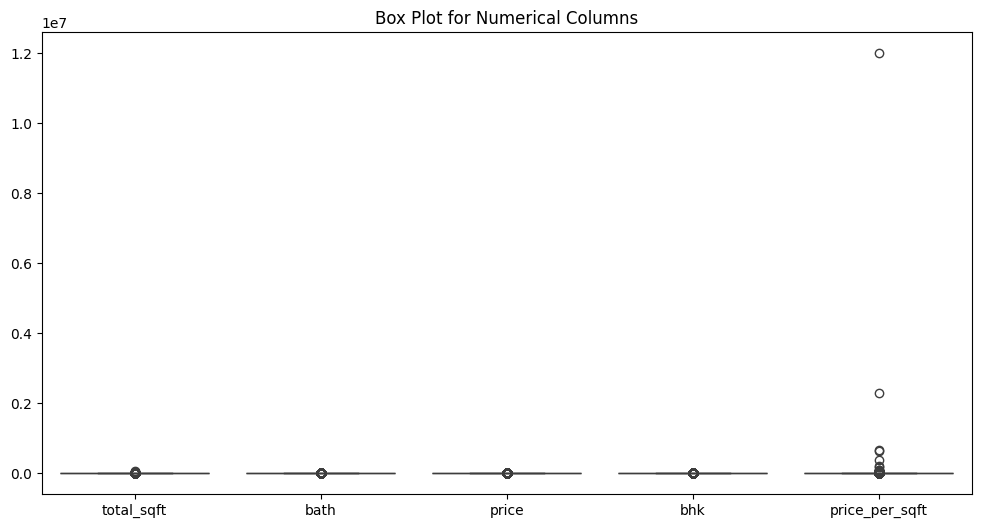

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df.select_dtypes(include=[np.number]))
plt.title('Box Plot for Numerical Columns')
plt.show()

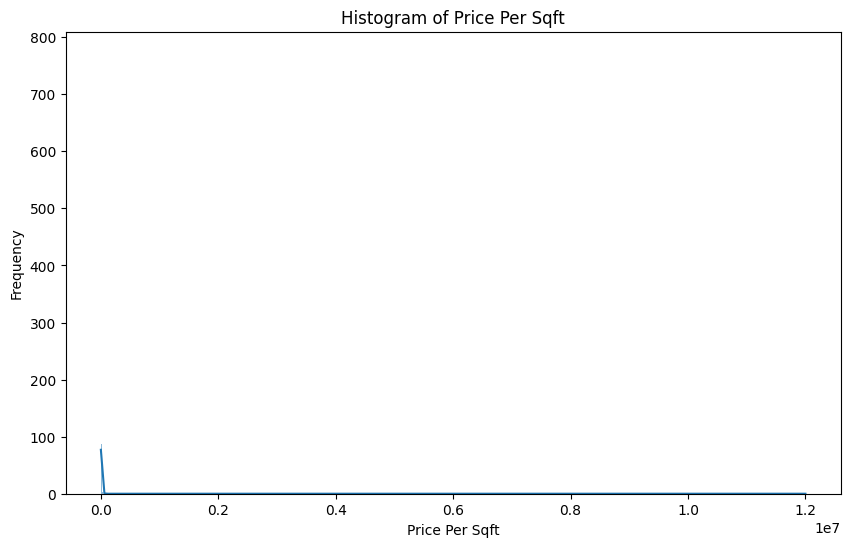

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price_per_sqft'], kde=True)
plt.title('Histogram of Price Per Sqft')
plt.xlabel('Price Per Sqft')
plt.ylabel('Frequency')
plt.show()

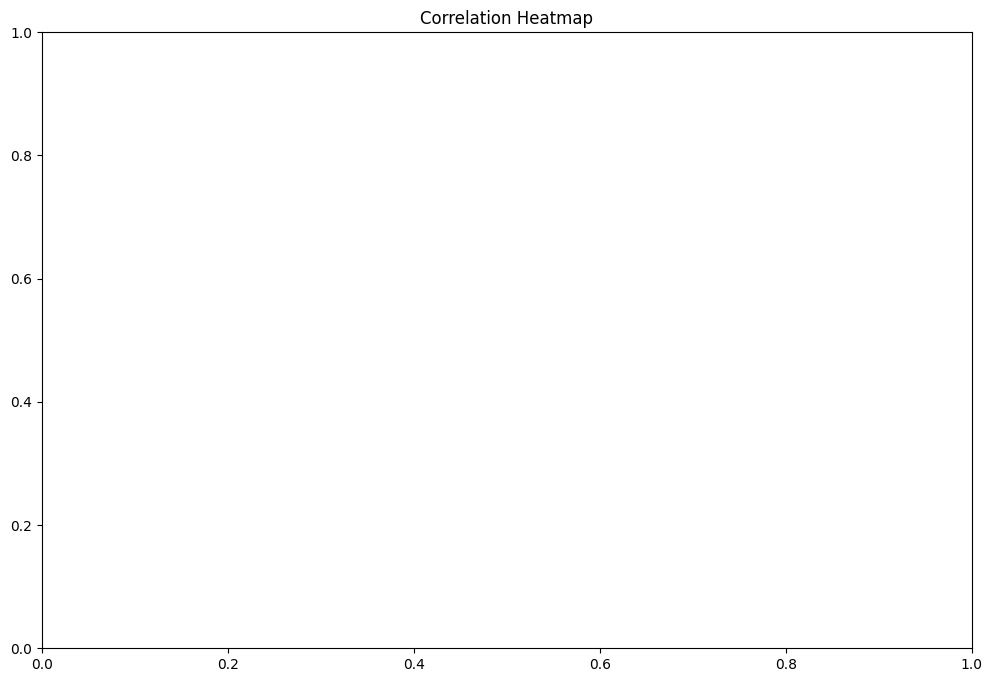

In [ ]:
plt.figure(figsize=(12, 8))
plt.title('Correlation Heatmap')
plt.show()


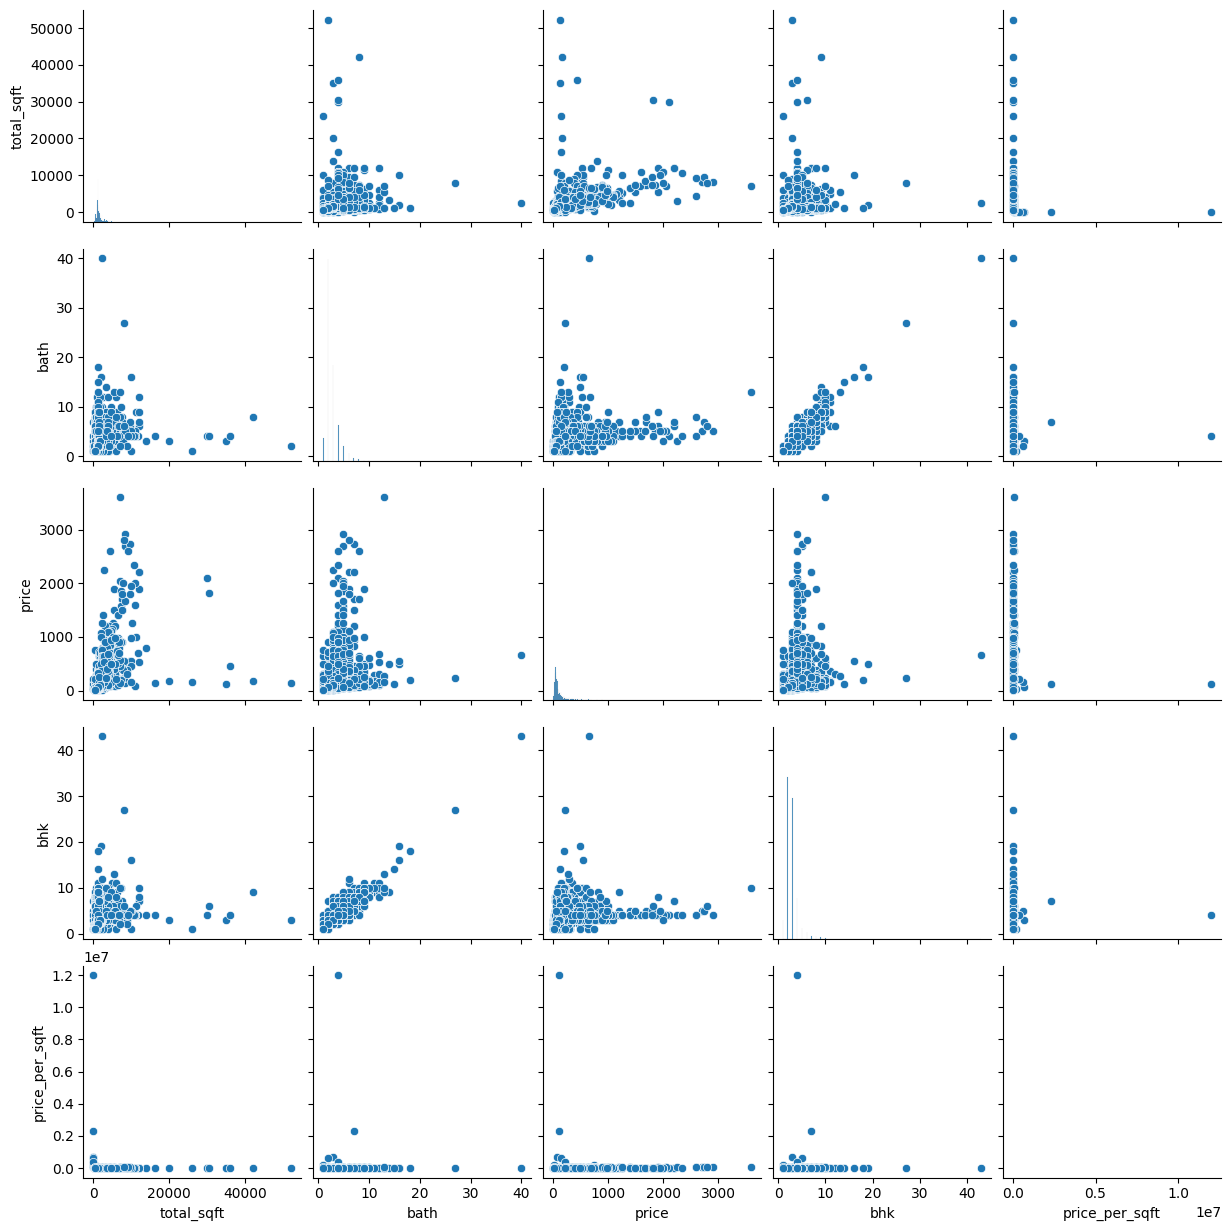

In [ ]:
sns.pairplot(df.select_dtypes(include=['float64', 'int64']))
plt.show()